In [1]:
import cobra
import pandas as pd
from util.manipulation import load_latest_model
import numpy as np
import matplotlib.pyplot as plt

### Tutorial 1: General manipulations

This tutorial covers the general manipulations that can performed on the *i*JL208 model. The following basic manipulations are executed:

    1- Load the latest version of the model and display the number of reactions, genes and metabolites
    2- Get the optimal solution and growth rate prediction
    3- Get and display a predicted flux state, the number of used reactions
    4- Formulate a single gene essentiality prediction
    5- Using parsimonious FBA (pFBA) for results more similar to expression data

In [5]:
#Use the util function to load the latest model from the model_versions folder
model = load_latest_model()

In [6]:
#Display the number of reactions, genes and metabolites in the model
print(f"The {model.name} model contains {len(model.reactions)} reactions, {len(model.genes)} genes and {len(model.metabolites)} metabolites")

The iJL208 with inactive CHTNDAe model contains 364 reactions, 207 genes and 348 metabolites


In [23]:
for g in model.reactions.PDH.genes:
    print(g.id, g.notes)

Mfl042 {'EC_number': {'PATRIC': '1.8.1.4', 'DETECT': '1.8.1.4', 'COFACTOR': '1.8.1.4'}, 'Sequence': 'MFKVKFADIGEGLTEGKVAEVLVKLGQEIKEGDALFFVETDKVNSEIPAPVGGKIAKVLISEGQEIKVGDVVIEIDDGSATVEAAPAAEEENASVVGSTPVSNDLIPSRGPAPTQNVAAQPTPAPVATKHTDIEESFDVIVVGAGIGGYVSAIKTAQLGLKTLIIEKQYYGGVCLNVGCIPTKSLLRTAKVFEDIVHKAANLGIDMKTKDEPSINWNKALERKDGVVNKLTGGVKVLLTKNGVKQIIGEASALDKNTISVNGKKYHCDNLIIASGSVPNELPLPGFAEGRESGFLIDSTKILSLPKIPKTLTVIGGGVIGIEFGCLFAALGTKVTVIEGAPKILPMLDQDVTALMTKTLKEKYKIEIFTNAKVKEVKGKSVVFEIDGKEQTVKSDYCLESIGRKTVTKGFDGIGLELSERKSIIANDYGETNLEGVYAIGDVTSKIMLAHVASHAGIVTANRIALKANKPDAHDIKMDYSKIPSCIYSHPEIAMIGKTEQQLKEEGVEYKTFKFPFAAIGKALADDDTTGFVKIICEPKYKTLLGAHIIGNRATDMISEFTTLIECEGTITELARAIHPHPTMSEAIGEAAEALESGKSLNL'}
Mfl040 {'EC_number': {'PATRIC': '1.2.4.1', 'DETECT': '1.2.4.1', 'COFACTOR': '1.2.4.4'}, 'Sequence': 'MAVINNIKAVTEALDVAMDRDKNVIVFGEDVGLEGGVFRATQGLQQKYGIERSFNAPISEAMFAGVGLGMAMNGMKPVVELQFQGLGLPALQNVIANISRMRNRSRGKWTAPMVIRMPMGGGIRALEHHSEALEAIFAHIPGIKTVMPSTPYDTKGLLLAAIESPDPVIVLEPTKLYRAFKQEVPDGYYTVPI

In [32]:
for r in model.genes.Mfl041.reactions:
    print('#########')
    print(r.id, r.name)
    print(r.reaction)
    print(r.metabolites)

#########
PDH pyruvate dehydrogenase
coa_c + nad_c + pyr_c --> accoa_c + co2_c + nadh_c
{<Metabolite accoa_c at 0x7efef2503f98>: 1.0, <Metabolite co2_c at 0x7efed2554b00>: 1.0, <Metabolite coa_c at 0x7efed2554b70>: -1.0, <Metabolite nad_c at 0x7efed2559b70>: -1.0, <Metabolite nadh_c at 0x7efed2559ba8>: 1.0, <Metabolite pyr_c at 0x7efed255b518>: -1.0}


In [38]:
l = []
for g in model.genes:
    if len(g.reactions) > 1:
        l.append(g)
        
print(len(l))

55


In [28]:
for g in model.genes:
    print(g.id, g.reactions)
    for r in g.reactions:
        print(r)
        print(f"les metabolites associes a la reaction {r.metabolites}")
    break

Mfl017 frozenset({<Reaction SERTRS at 0x7efed23cd6a0>})
SERTRS: atp_c + ser__L_c + trnaser_c --> amp_c + ppi_c + sertrna_c
les metabolites {<Metabolite amp_c at 0x7efed2554470>: 1.0, <Metabolite atp_c at 0x7efed2554780>: -1.0, <Metabolite ppi_c at 0x7efed255b320>: 1.0, <Metabolite ser__L_c at 0x7efed255b748>: -1.0, <Metabolite sertrna_c at 0x7efed255b7b8>: 1.0, <Metabolite trnaser_c at 0x7efed255bef0>: -1.0}
les metabolites associes a la reaction {<Metabolite amp_c at 0x7efed2554470>: 1.0, <Metabolite atp_c at 0x7efed2554780>: -1.0, <Metabolite ppi_c at 0x7efed255b320>: 1.0, <Metabolite ser__L_c at 0x7efed255b748>: -1.0, <Metabolite sertrna_c at 0x7efed255b7b8>: 1.0, <Metabolite trnaser_c at 0x7efed255bef0>: -1.0}


In [53]:
gene_associated_reactions = []
for r in model.reactions:
    if len(r.genes) > 0:
        gene_associated_reactions.append(r)
        
print(len(gene_associated_reactions))

230


In [61]:
model.reactions.PDH.gene_reaction_rule = 'Mfl039 and Mfl040 and Mfl041 and Mfl042'
model.reactions.PDH.gene_reaction_rule

'Mfl039 and Mfl040 and Mfl041 and Mfl042'

In [62]:
cobra.io.save_json_model(model,'iJL208_PDH.json')

In [64]:
model.solver

In [63]:
#Get the predicted growth rate and validate that the model solves correctly
solution = model.optimize()
if solution.status == 'optimal':
    print(f"The {model.name} has an optimal solution and the predicted growth rate is: {solution.objective_value}")
else:
    raise ValueError(f"The model does not have an optimal solution, ensure the ")

The iJL208 with inactive CHTNDAe has an optimal solution and the predicted growth rate is: 0.5936996697548124


In [71]:
solution.fluxes['PDH']

10.199999999999987

In [72]:
solution.fluxes['EX_sucr_e']

-7.384105532349308

In [74]:
solution.fluxes.idxmax()

'ENO'

In [75]:
model.reactions.ENO.reaction

'2pg_c <=> h2o_c + pep_c'

In [76]:
model.reactions.ENO.genes

frozenset({<Gene Mfl468 at 0x7efed2570470>})

In [78]:
model.metabolites.pep_c.name

'Phosphoenolpyruvate'

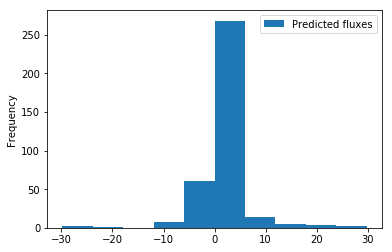

In [79]:
#Plot the predicted flux state
predicted_fluxes = pd.DataFrame({'Predicted fluxes':solution.fluxes.to_list()},index=solution.fluxes.index.to_list())
predicted_fluxes.plot(kind='hist')

In [81]:
#Get the number of used/unused reactions, those are the reactions for which no flux is predicted
used_reactions = predicted_fluxes[predicted_fluxes['Predicted fluxes']!=0]
unused_reactions = predicted_fluxes[predicted_fluxes['Predicted fluxes']==0]
print(f"The model has {len(used_reactions)} used reactions and {len(unused_reactions)} unused reactions")

The model has 217 used reactions and 147 unused reactions


In [82]:
#Formulate a single gene essentiality prediction
from cobra.flux_analysis import single_gene_deletion
single_gene_essentiality_prediction = single_gene_deletion(model)

In [83]:
single_gene_essentiality_prediction

growth      status
ids                               
(Mfl490)  9.697894e-15     optimal
(Mfl031)  5.936997e-01     optimal
(Mfl465)  5.936997e-01     optimal
(Mfl116)  4.417793e-01     optimal
(Mfl356)  5.936997e-01     optimal
(Mfl617)  5.936997e-01     optimal
(Mfl120)  1.024206e-14     optimal
(Mfl109)  4.417793e-01     optimal
(Mfl521)  1.326846e-16     optimal
(Mfl502)           NaN  infeasible
(Mfl613)  1.326846e-16     optimal
(Mfl643)  5.936997e-01     optimal
(Mfl214)  0.000000e+00     optimal
(Mfl060)  5.936997e-01     optimal
(Mfl026)  5.921175e-01     optimal
(Mfl668)  5.936997e-01     optimal
(Mfl500)  5.936997e-01     optimal
(Mfl145)  5.936997e-01     optimal
(Mfl526)  5.936997e-01     optimal
(Mfl664)  5.936997e-01     optimal
(Mfl399)  1.992023e-16     optimal
(Mfl562)  5.936997e-01     optimal
(Mfl096)  9.960117e-17     optimal
(Mfl286)  9.960117e-17     optimal
(Mfl340) -9.960117e-17     optimal
(Mfl497)  5.936997e-01     optimal
(Mfl025)  5.921175e-01     optimal
(Mfl112)  4.417793e-01     optimal
(Mfl042)           NaN  infeasible
(Mfl248) -2.248424e-16     optimal
...                ...         ...
(Mfl591) -1.489240e-16     optimal
(Mfl095) -1.489240e-16     optimal
(Mfl529) -1.489240e-16     optimal
(Mfl162)  5.936997e-01     optimal
(Mfl554) -1.489240e-16     optimal
(Mfl174)           NaN  infeasible
(Mfl590) -4.467720e-16     optimal
(Mfl663) -5.191565e-16     optimal
(Mfl097) -5.191565e-16     optimal
(Mfl163)  5.936997e-01     optimal
(Mfl233)  1.596311e-01     optimal
(Mfl119) -3.941084e-15     optimal
(Mfl023)  5.921175e-01     optimal
(Mfl074)  5.936997e-01     optimal
(Mfl167)  5.936997e-01     optimal
(Mfl177)  1.428043e-16     optimal
(Mfl334)  5.936997e-01     optimal
(Mfl070)  5.936997e-01     optimal
(Mfl198)  2.261068e-16     optimal
(Mfl425)  5.936997e-01     optimal
(Mfl064) -3.570108e-17     optimal
(Mfl175)           NaN  infeasible
(Mfl041)           NaN  infeasible
(Mfl187)  5.936997e-01     optimal
(Mfl215)  4.587724e-01     optimal
(Mfl565)           NaN  infeasible
(Mfl114)  4.417793e-01     optimal
(Mfl315)  5.936997e-01     optimal
(Mfl076) -9.777995e-14     optimal
(Mfl347)  5.936997e-01     optimal

[207 rows x 2 columns]

In [84]:
#Get the list of essential gene
#Define a threshold for essential as 50% of the original growth rate
essentiality_threshold = solution.objective_value * 0.5
#Essential genes have a predicted growth rate inferior or equal to the threshold or NaN
essential_genes = [list(g)[0] for g in single_gene_essentiality_prediction[(single_gene_essentiality_prediction['growth']<=essentiality_threshold)\
                                                                          |(single_gene_essentiality_prediction['growth'].isna())].index]
#Non essential genes have a predicted growth rate higher than threshold
non_essential_genes = [list(g)[0] for g in single_gene_essentiality_prediction[single_gene_essentiality_prediction['growth']> essentiality_threshold].index]

In [85]:
#Display the number of essential and non essential genes
print(f"The model has {len(essential_genes)} essential genes and {len(non_essential_genes)} non essentials")

The model has 97 essential genes and 110 non essentials


In [86]:
#Optimize the model using pFBA
from cobra.flux_analysis import pfba

In [87]:
#Generate the pFBA solution
pfba_solution = pfba(model)
#This solution contains the same elements as a regular FBA solution 
#--> objective_value, fluxes, shadow_prices, reduced_costs and status

In [88]:
#Now compare the two flux predictions
#Plot the predicted flux state
pfba_predicted_fluxes = pd.DataFrame({'pFBA predicted fluxes':pfba_solution.fluxes.to_list()},index=pfba_solution.fluxes.index.to_list())

Text(0, 0.5, 'pFBA')

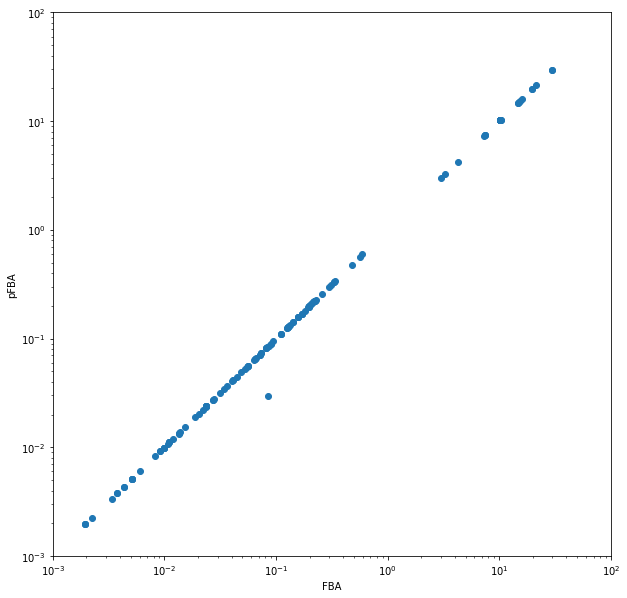

In [89]:
#Compare the two flux distributions 
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111)
x = predicted_fluxes['Predicted fluxes'].tolist()
y = pfba_predicted_fluxes['pFBA predicted fluxes'].tolist()
ax.scatter(x=x,y=y)

#Display on log scale
ax.set_yscale('log')
ax.set_xscale('log')
ax.set_xlim(1e-3,1e2)
ax.set_ylim(1e-3,1e2)
ax.set_xlabel('FBA')
ax.set_ylabel('pFBA')

In [90]:
#Get the flux predictions difference
all_fluxes = pd.concat([predicted_fluxes,pfba_predicted_fluxes],axis=1,sort=True)
all_fluxes['difference'] = all_fluxes['pFBA predicted fluxes'] - all_fluxes['Predicted fluxes']
#Display
all_fluxes[all_fluxes['difference'] > 1e-9]

Predicted fluxes  pFBA predicted fluxes  difference
EX_gly_met__L_e         -0.054765               0.000000    0.054765
EX_h2o_e                -4.303542              -4.248777    0.054765
METabc                   0.000000               0.054765    0.054765

#### End of the first tutorial

In this tutorial, only static observations of the model were performed and slighlty compared to one another. In Tutorial 2, we will apply modifications to the model, generate and compare new predictions resulting from these modifications. 